# Alunos:
 - Thiago Henrique Vicentini, 11234270
 - Matheus Vieira Gonçalves, 11200397

# Utilidade

In [1]:
from numpy  import *
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import requests
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from community import community_louvain
from networkx.algorithms.community import greedy_modularity_communities
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
def tratar_grafo(G):
    G = G.to_undirected()
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    G = nx.convert_node_labels_to_integers(G, first_label=0)
    return G

# Estatisticas

In [3]:
def momment_of_degree_distribution(G,m):
        M = 0
        N = len(G)
        for i in G.nodes:
            M = M + G.degree(i)**m
        M = M/N
        return M

In [4]:
def average_degree(G):
    return 2*G.number_of_edges()/len(G)

In [5]:
def complexity(G):
  return (momment_of_degree_distribution(G,2)/momment_of_degree_distribution(G,1))

In [6]:
def degree_distribution(GER):
    vk = dict(GER.degree())
    vk = list(vk.values())
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues= arange(0,maxk+1) 
    Pk = np.zeros(maxk+1) 
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk)
    return kvalues,Pk

In [7]:
def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

In [8]:
def pearson_k_knn(G):
  knn = []
  for i in G.nodes():
      aux =  nx.average_neighbor_degree(G, nodes = [i])
      knn.append(float(aux[i]))
  knn = np.array(knn)

  vk = dict(G.degree())
  vk = list(vk.values())

  knnk = list()
  ks = list()
  for k in arange(np.min(vk), np.max(vk)):
      aux = vk == k
      if(len(knn[aux]) > 0):
          av_knn = mean(knn[aux])
          knnk.append(av_knn)
          ks.append(k)

  from scipy.stats import pearsonr
  rho = corrcoef(ks, knnk)[0,1]
  return rho

In [9]:
def media_eigenvector(G):
  EC = dict(nx.eigenvector_centrality(G, max_iter = 1000))
  EC = list(EC.values())
  av_EC = np.mean(EC)
  return av_EC

In [10]:
def pearson_betweenness_degree(G):
  vk = dict(G.degree())
  vk = list(vk.values())

  Bcentrality = dict(nx.betweenness_centrality(G))
  Bcentrality = list(Bcentrality.values())

  from scipy.stats import pearsonr
  coeficiente = corrcoef(vk, Bcentrality)[0,1]
  return coeficiente

In [11]:
def pearson_eigenvector_degree(G):
  vk = dict(G.degree())
  vk = list(vk.values())

  Ecentrality = dict(nx.eigenvector_centrality(G, max_iter = 1000))
  Ecentrality = list(Ecentrality.values())

  from scipy.stats import pearsonr
  coeficiente = corrcoef(vk, Ecentrality)[0,1]
  return coeficiente

In [12]:
def spearman_closenesss_k_core(G):

  KC= dict(nx.core_number(G)) 
  KC = list(KC.values())

  CLC = dict(nx.closeness_centrality(G))
  CLC = list(CLC.values())

  from scipy import stats
  coeficiente = stats.spearmanr(KC, CLC)[0]
  return coeficiente

In [13]:
def modularity(G, c):
    A = nx.adjacency_matrix(G)
    N = len(G)
    M = G.number_of_edges()
    Q = 0
    for i in np.arange(0,N):
        ki = len(list(G.neighbors(i)))
        for j in np.arange(0,N):
            if(c[i]==c[j]):
                kj = len(list(G.neighbors(j)))
                Q = Q + A[i,j]-(ki*kj)/(2*M)
    Q = Q/(2*M)
    return Q
  
def sortCommunities(G):
  c = list(greedy_modularity_communities(G))

  communities = np.zeros(len(G.nodes()))
  nc = 0

  for k in range(0,len(c)):
      communities[sorted(c[k])]=nc
      nc = nc+1

  return communities

def modularity_louvain(G):
    partitions =community_louvain.best_partition(G)
    return modularity(G,partitions)

def modularity_fast_greedy(G):
    communities = sortCommunities(G)
    return modularity(G,communities)


In [14]:
def measures(G):
    N = len(G)
    M = G.number_of_edges()
    vk = dict(G.degree())
    vk = list(vk.values())
    vk = np.array(vk)

    complexity_v = complexity(G)
    shannon_entropy_v = shannon_entropy(G)
    pearson_k_knn_v = pearson_k_knn(G)
    media_eigenvector_v = media_eigenvector(G)
    pearson_betweenness_degree_v = pearson_betweenness_degree(G)
    pearson_eigenvector_degree_v = pearson_eigenvector_degree(G)
    modularity_louvain_v = modularity_louvain(G)
    modularity_fast_greedy_v = modularity_fast_greedy(G);
    transitivity = nx.transitivity(G)
    g_efficiency = nx.global_efficiency(G)

    k1 = momment_of_degree_distribution(G,1)
    k2 = momment_of_degree_distribution(G,2)
    variance = momment_of_degree_distribution(G,2) - momment_of_degree_distribution(G,1)**2
    av_cl = nx.average_clustering(G)
    l = nx.average_shortest_path_length(G)
    r=nx.degree_assortativity_coefficient(G)

    return  [g_efficiency, transitivity, k1,k2,variance,av_cl,l,r,complexity_v,pearson_k_knn_v,media_eigenvector_v, pearson_betweenness_degree_v, pearson_eigenvector_degree_v, modularity_fast_greedy_v, modularity_louvain_v]


In [15]:
cl = ['WS','ER','BA']

def gerar_redes(N, k1):
    X = []
    y = []
    n_nets = 30
    
    #ER networks
    av_degree = k1
    p = av_degree/(N-1)
    for i in range(0,n_nets):
        GER = nx.gnp_random_graph(N, p, seed=None, directed=False)
        Gcc = sorted(nx.connected_components(GER), key=len, reverse=True)
        GER = GER.subgraph(Gcc[0])
        GER = nx.convert_node_labels_to_integers(GER, first_label=0)
        x = measures(GER)
        X.append(x)
        y.append(1.0)

    #WS networks
    k = int(av_degree)
    p = 0.1 #probability of rewiring
    for i in range(0,n_nets):
        GWS = nx.watts_strogatz_graph(N, k, p, seed=None)
        Gcc = sorted(nx.connected_components(GWS), key=len, reverse=True)
        GWS = GWS.subgraph(Gcc[0])
        GWS = nx.convert_node_labels_to_integers(GWS, first_label=0)
        x = measures(GWS)
        X.append(x)
        y.append(0.0)

    # BA networks
    m = int(av_degree/2)
    for i in range(0,n_nets):
        GBA = nx.barabasi_albert_graph(N, m)    
        Gcc = sorted(nx.connected_components(GBA), key=len, reverse=True)
        GBA = GBA.subgraph(Gcc[0])
        GBA = nx.convert_node_labels_to_integers(GBA, first_label=0)
        x = measures(GWS)
        X.append(x)
        y.append(2.0)
    
    return X, y

In [16]:
def classificar(X, y, X_net):

    X = np.array(X)
    y = np.array(y)
    
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)

    X_net = np.array(X_net)
    X_net = X_net.reshape(1, len(X_net)) 
    X_net = scaler.transform(X_net)
    print('Xnet:', X_net.shape)
    
    # faz a predição no conjunto de teste
    k = 5
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    #model = LinearDiscriminantAnalysis()
    model.fit(X,y)
    # faz a predição em X_net
    y_pred = model.predict(X_net) 
    print('Classe (KNeighbors):', cl[int(y_pred)])

    model = LinearDiscriminantAnalysis()
    model.fit(X,y)
    # faz a predição em X_net
    y_pred = model.predict(X_net) 
    print('Classe (LDA):', cl[int(y_pred)])

In [17]:
from sklearn.tree import DecisionTreeClassifier
def feature_importance(X, y):
  clf = DecisionTreeClassifier()
  clf.fit(X, y)
  feat_importance = clf.tree_.compute_feature_importances(normalize=False)
  print("feat importance = " + str(feat_importance))
  return feat_importance

# Redes Sociais
## Rede 1: Innovation spread among physicians

In [18]:
feature_important_sum = np.zeros(15)
feature_important_sum

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
G1 = nx.readwrite.adjlist.read_adjlist("social/moreno_innovation.txt")
G1 = tratar_grafo(G1)

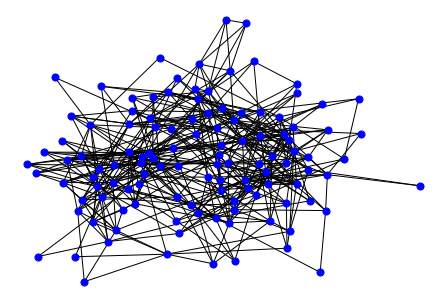

In [20]:
pos = nx.spring_layout(G1)
nx.draw(G1, pos, node_color="b", node_size=50, with_labels=False)

In [21]:
X_net_1 = measures(G1)
N1 = len(G1)
print(N1)
print(X_net_1)

117
[0.431955496610642, 0.17498799807969276, 7.948717948717949, 79.16239316239316, 15.980276134122278, 0.2192320594884697, 2.5870910698496905, -0.08415842551291426, 9.959139784946236, -0.3505224913775309, 0.07986068576345219, 0.9236015519008762, 0.9057883170617201, 0.35719505145103453, 0.3901953983119441]


In [22]:
X, y = gerar_redes(N1, average_degree(G1))
classificar(X, y, X_net_1)
feature_important_sum += feature_importance(X,y)

Xnet: (1, 15)
Classe (KNeighbors): ER
Classe (LDA): ER
feat importance = [0.         0.33333333 0.         0.         0.         0.
 0.         0.         0.         0.31182796 0.         0.
 0.         0.         0.02150538]


## Rede 2: Residence hall


In [23]:
G2 = nx.readwrite.adjlist.read_adjlist("social/moreno_innovation.txt")
G2 = tratar_grafo(G2)

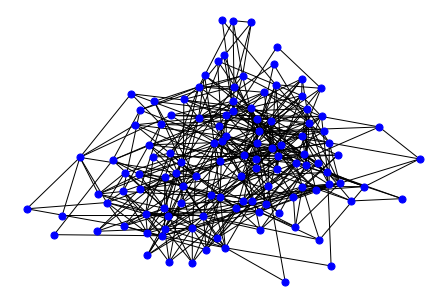

In [24]:
pos = nx.spring_layout(G2)
nx.draw(G2, pos, node_color="b", node_size=50, with_labels=False)

In [25]:
X_net_2 = measures(G2)
N2 = len(G2)
print(N2)
print(X_net_2)

117
[0.431955496610642, 0.17498799807969276, 7.948717948717949, 79.16239316239316, 15.980276134122278, 0.2192320594884697, 2.5870910698496905, -0.08415842551291426, 9.959139784946236, -0.3505224913775309, 0.07986068576345219, 0.9236015519008762, 0.9057883170617201, 0.35719505145103453, 0.3910718002081174]


In [26]:
X_2, y_2 = gerar_redes(N2, average_degree(G2))
classificar(X_2, y_2, X_net_2)
feature_important_sum += feature_importance(X_2,y_2)

Xnet: (1, 15)
Classe (KNeighbors): ER
Classe (LDA): ER
feat importance = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.31182796 0.         0.35483871]


## Rede 3: Jazz musicians

In [27]:
G3 = nx.readwrite.adjlist.read_adjlist("social/arenas_jazz.txt")
G3 = tratar_grafo(G3)

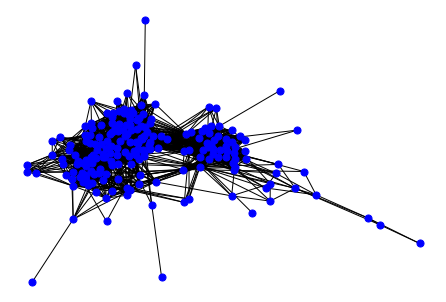

In [28]:
pos = nx.spring_layout(G3)
nx.draw(G3, pos, node_color="b", node_size=50, with_labels=False)

In [29]:
X_net_3 = measures(G3)
N3 = len(G3)
print(N3)
print(X_net_3)

198
[0.5131971149737273, 0.5202592721776538, 27.696969696969695, 1070.2424242424242, 303.1202938475667, 0.6174507021536301, 2.2350407629595446, 0.02023739927504758, 38.64113785557987, 0.38784826096183334, 0.05587251505930269, 0.6051349791324673, 0.900996937442616, 0.43890781537537776, 0.44467600462002604]


In [30]:
X_3, y_3 = gerar_redes(N3, average_degree(G3))
classificar(X_3, y_3, X_net_3)
feature_important_sum += feature_importance(X_3,y_3)

Xnet: (1, 15)
Classe (KNeighbors): ER
Classe (LDA): WS
feat importance = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.31182796
 0.         0.33333333 0.02150538]


# Redes biológicas

## Rede 1: Golfinhos

In [31]:
G4 = nx.readwrite.adjlist.read_adjlist("biological/dolphins.txt")
G4 = tratar_grafo(G4)

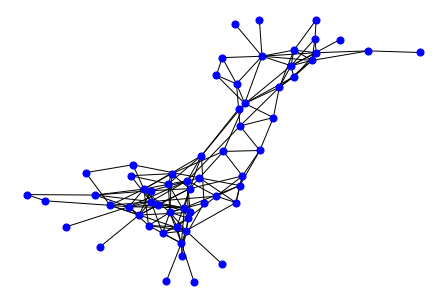

In [32]:
pos = nx.spring_layout(G4)
nx.draw(G4, pos, node_color="b", node_size=50, with_labels=False)

In [33]:
X_net_4 = measures(G4)
N4 = len(G4)
print(N4)
print(X_net_4)

62
[0.3792141975774991, 0.3087757313109426, 5.129032258064516, 34.903225806451616, 8.596253902185229, 0.25895824605502027, 3.3569539925965097, -0.04359402821531252, 6.805031446540881, -0.23083862364440996, 0.09077737684046705, 0.5902140090674486, 0.7196918522741873, 0.4954906847039269, 0.5188283691309661]


In [34]:
X_4, y_4 = gerar_redes(N4, average_degree(G4))
classificar(X_4, y_4, X_net_4)
feature_important_sum += feature_importance(X_4,y_4)

Xnet: (1, 15)
Classe (KNeighbors): ER
Classe (LDA): ER
feat importance = [0.         0.         0.         0.         0.33333333 0.
 0.         0.         0.         0.         0.         0.31182796
 0.         0.         0.02150538]


## Rede 2: Macacos japoneses

In [35]:
G5 = nx.read_edgelist("biological/moreno_mac.txt", nodetype=int, data=(('weight',float),))
G5 = tratar_grafo(G5)

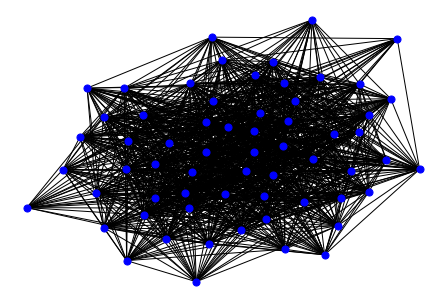

In [36]:
pos = nx.spring_layout(G5)
nx.draw(G5, pos, node_color="b", node_size=50, with_labels=False)

In [37]:
X_net_5 = measures(G5)
N5 = len(G5)
print(N5)
print(X_net_5)

62
[0.8085668958223162, 0.6599419742257607, 37.645161290322584, 1471.9354838709678, 54.7773152965658, 0.6671447959822828, 1.3828662083553676, -0.07257998232135444, 39.10025706940874, -0.7965854245397779, 0.1248223480875235, 0.9351489929894575, 0.9941537860387885, 1.047129391602398, 0.7209901100603661]


In [38]:
X_5, y_5 = gerar_redes(N5, average_degree(G5))
classificar(X_5, y_5, X_net_5)
feature_important_sum += feature_importance(X_5,y_5)

Xnet: (1, 15)
Classe (KNeighbors): WS
Classe (LDA): BA
feat importance = [0.         0.29166667 0.         0.         0.         0.
 0.         0.         0.33333333 0.         0.         0.02016129
 0.         0.         0.02150538]


## Rede 3: Ovelhas

In [39]:
G6 = nx.readwrite.adjlist.read_adjlist("biological/moreno_sheep.txt")
G6 = tratar_grafo(G6)

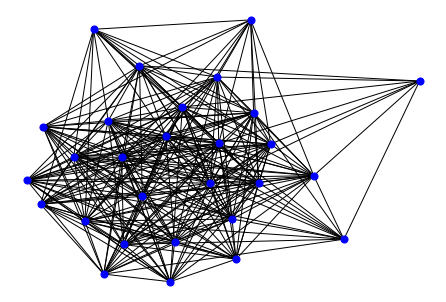

In [40]:
pos = nx.spring_layout(G6)
nx.draw(G6, pos, node_color="b", node_size=50, with_labels=False)

In [41]:
X_net_6 = measures(G6)
N6 = len(G6)
print(N6)
print(X_net_6)

28
[0.8637566137566137, 0.7713323353293413, 19.642857142857142, 401.35714285714283, 15.515306122448976, 0.7776828995161351, 1.2724867724867726, -0.09217079023822024, 20.432727272727274, -0.7643830464162619, 0.18556959215145288, 0.7733950156051099, 0.9926538491597477, 0.0454809917355373, 0.049500826446280996]


In [42]:
X_6, y_6 = gerar_redes(N6, average_degree(G6))
classificar(X_6, y_6, X_net_6)
feature_important_sum += feature_importance(X_6,y_6)

Xnet: (1, 15)
Classe (KNeighbors): ER
Classe (LDA): ER
feat importance = [0.         0.57142857 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.07373272 0.         0.00076464]


# Redes Técnológicas

## Rede 1: Software dependency of Flamingo 4.1 suite

In [43]:
G7 = nx.read_edgelist("technological/flamingo.txt")
G7 = tratar_grafo(G7)

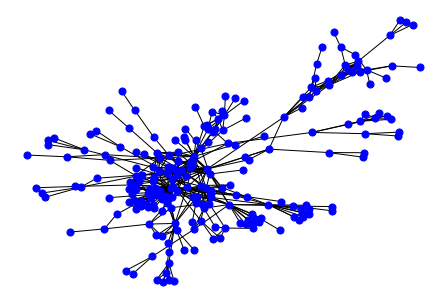

In [44]:
pos = nx.spring_layout(G7)
nx.draw(G7, pos, node_color="b", node_size=50, with_labels=False)

In [45]:
X_net_7 = measures(G7)
N7 = len(G7)
print(N7)
print(X_net_7)

228
[0.2594844333947403, 0.18141263940520447, 4.307017543859649, 39.70175438596491, 21.15135426285011, 0.3071431272272333, 4.679225597032228, -0.057278344020036225, 9.217922606924644, -0.09116984138137105, 0.03403308725902538, 0.7475253105852465, 0.8166231197676616, 0.6815033121647989, 0.703551918234956]


In [46]:
X_7, y_7 = gerar_redes(N7, average_degree(G7))
classificar(X_7, y_7, X_net_7)
feature_important_sum += feature_importance(X_7,y_7)

Xnet: (1, 15)
Classe (KNeighbors): ER
Classe (LDA): ER
feat importance = [0.         0.         0.         0.         0.         0.07373272
 0.         0.         0.23809524 0.         0.         0.33333333
 0.         0.         0.02150538]


## Rede 2: Software documentation of JUNG graph & network framework.

In [47]:
G8 = nx.readwrite.adjlist.read_adjlist("technological/djung.txt")
G8 = tratar_grafo(G8)

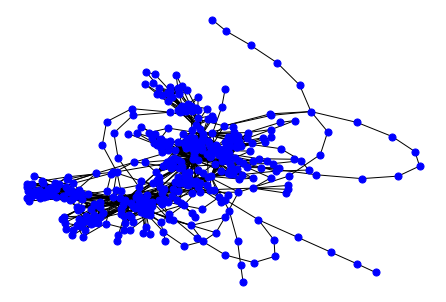

In [48]:
pos = nx.spring_layout(G8)
nx.draw(G8, pos, node_color="b", node_size=50, with_labels=False)

In [49]:
X_net_8 = measures(G8)
N8 = len(G8)
print(N8)
print(X_net_8)

435
[0.2793793479561714, 0.1812229380082374, 5.99080459770115, 93.06206896551724, 57.17232923768001, 0.32787669393578045, 4.329233539912072, -0.12501436034323768, 15.534151957022255, -0.5063580428411002, 0.02556864769722027, 0.8485108195213584, 0.7300411226051411, 0.656608311064389, 0.6951544608374332]


In [50]:
X_8, y_8 = gerar_redes(N8, average_degree(G8))
classificar(X_8, y_8, X_net_8)
feature_important_sum += feature_importance(X_8,y_8)

Xnet: (1, 15)
Classe (KNeighbors): ER
Classe (LDA): ER
feat importance = [0.         0.08960573 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.57706093]


## Rede 3: Facebook friendships

In [51]:
G9 = nx.readwrite.adjlist.read_adjlist("technological/slavko.txt")
G9 = tratar_grafo(G9)

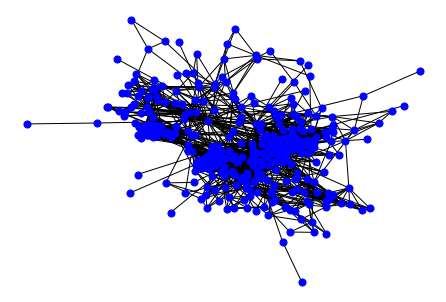

In [52]:
pos = nx.spring_layout(G9)
nx.draw(G9, pos, node_color="b", node_size=50, with_labels=False)

In [53]:
X_net_9 = measures(G9)
N9 = len(G9)
print(N9)
print(X_net_9)

324
[0.3701272516803375, 0.467989417989418, 13.691358024691358, 293.69135802469134, 106.23807346441092, 0.4658050373924983, 3.0537400145243283, 0.2473220043644715, 21.450856627592426, 0.6679314292335531, 0.03516025532956667, 0.5731336091733873, 0.8804241105114834, 0.5327900626158045, 0.6275494336443898]


In [54]:
X_9, y_9 = gerar_redes(N9, average_degree(G9))
classificar(X_9, y_9, X_net_9)
feature_important_sum += feature_importance(X_9,y_9)

Xnet: (1, 15)
Classe (KNeighbors): ER
Classe (LDA): ER
feat importance = [0.         0.         0.         0.         0.         0.
 0.33333333 0.         0.         0.31182796 0.         0.
 0.         0.         0.02150538]


In [55]:
feature_important_sum

array([0.        , 1.28603431, 0.        , 0.        , 0.33333333,
       0.07373272, 0.33333333, 0.        , 0.57142857, 0.62365591,
       0.        , 0.97715054, 0.38556068, 0.33333333, 1.06169654])

# Conclusão

Como pode ser observado a maioria das análises, utilizando tanto o KNeighbours quanto o LDA mostraram como resultado uma rede do tipo ER, o que pode ser explicado, como dito em aula, por serem redes muito pequenas (de 100 a 400 nós).  
Tendo isso em mente, testamos separadamente (devido a problemas de tempo de execução) algumas redes maiores que, de fato, mostraram classificações diferentes. No caso mostrado poderiamos dizer que redes do mesmo tipo de fato parecem seguir o mesmo modelo, entretanto não seria um resultado válido sobre a hipótese, visto as limitações já citadas.   
Outro fato a se destacar é que para fazer uma análise mais precisa seria necessário uma quantidade maior de redes aleatórias e tambem de uma especificação mais refinada do tipo, por exemplo, dividir redes biólogicas em redes metabólicas, neurais, animais e etc.

## Sobre o bônus
Como a maioria das redes foram classificadas como ER, podemos falar justamente da que se destaciou como WS, sendo assim, como uma de suas principais caracteristicas é sua densidade e um pequeno diâmetro, podemos imaginar que as medidas de centralidade são as que possuem o maior peso na classificação como betweness centrality e eigenvector centrality, o que de fato ocorreu como observado.